# Project: Ocular Disease Recognition

A total of 6392 images were made availabe to be classified under 8 classes (N, D, G, C, A, A, H, M, O) by the model subsequently developed.

In [1]:
# Importing the required python libraries:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.utils import to_categorical
from keras.preprocessing import image
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tqdm import tqdm
%matplotlib inline

# Loading and Preparing the Data:

In [11]:
# Reading the csv file:
df = pd.read_csv(r'C:\Users\hp\Desktop\AIML\Internship_DL\full_df.csv')
df

,ID,Patient Age,Patient Sex,Left-Fundus,Right-Fundus,Left-Diagnostic Keywords,Right-Diagnostic Keywords,N,D,G,C,A,H,M,O,filepath,raw labels,target,filename,labels
0,0,69,Female,0_left.jpg,0_right.jpg,cataract,normal fundus,0,0,0,1,0,0,0,0,../input/ocular-disease-recognition-odir5k/ODI...,['N'],"[1, 0, 0, 0, 0, 0, 0, 0]",0_right.jpg,N
1,1,57,Male,1_left.jpg,1_right.jpg,normal fundus,normal fundus,1,0,0,0,0,0,0,0,../input/ocular-disease-recognition-odir5k/ODI...,['N'],"[1, 0, 0, 0, 0, 0, 0, 0]",1_right.jpg,N
2,2,42,Male,2_left.jpg,2_right.jpg,laser spot，moderate non proliferative retinopathy,moderate non proliferative retinopathy,0,1,0,0,0,0,0,1,../input/ocular-disease-recognition-odir5k/ODI...,['D'],"[0, 1, 0, 0, 0, 0, 0, 0]",2_right.jpg,D
3,4,53,Male,4_left.jpg,4_right.jpg,macular epiretinal membrane,mild nonproliferative retinopathy,0,1,0,0,0,0,0,1,../input/ocular-disease-recognition-odir5k/ODI...,['D'],"[0, 1, 0, 0, 0, 0, 0, 0]",4_right.jpg,D
4,5,50,Female,5_left.jpg,5_right.jpg,moderate non proliferative retinopathy,moderate non proliferative retinopathy,0,1,0,0,0,0,0,0,../input/ocular-disease-recognition-odir5k/ODI...,['D'],"[0, 1, 0, 0, 0, 0, 0, 0]",5_right.jpg,D
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6387,4686,63,Male,4686_left.jpg,4686_right.jpg,severe nonproliferative retinopathy,proliferative diabetic retinopathy,0,1,0,0,0,0,0,0,../input/ocular-disease-recognition-odir5k/ODI...,['D'],"[0, 1, 0, 0, 0, 0, 0, 0]",4686_left.jpg,D
6388,4688,42,Male,4688_left.jpg,4688_right.jpg,moderate non proliferative retinopathy,moderate non proliferative retinopathy,0,1,0,0,0,0,0,0,../input/ocular-disease-recognition-odir5k/ODI...,['D'],"[0, 1, 0, 0, 0, 0, 0, 0]",4688_left.jpg,D
6389,4689,54,Male,4689_left.jpg,4689_right.jpg,mild nonproliferative retinopathy,normal fundus,0,1,0,0,0,0,0,0,../input/ocular-disease-recognition-odir5k/ODI...,['D'],"[0, 1, 0, 0, 0, 0, 0, 0]",4689_left.jpg,D
6390,4690,57,Male,4690_left.jpg,4690_right.jpg,mild nonproliferative retinopathy,mild nonproliferative retinopathy,0,1,0,0,0,0,0,0,../input/ocular-disease-recognition-odir5k/ODI...,['D'],"[0, 1, 0, 0, 0, 0, 0, 0]",4690_left.jpg,D


In [12]:
# Filtering to get required fields:
del (df['filename'], df['Left-Fundus'], df['Right-Fundus'], df['filepath'], df['Patient Age'], df['Patient Sex'], df['Left-Diagnostic Keywords'], df['Right-Diagnostic Keywords'], df['labels'])
df

,ID,N,D,G,C,A,H,M,O,raw labels,target
0,0,0,0,0,1,0,0,0,0,['N'],"[1, 0, 0, 0, 0, 0, 0, 0]"
1,1,1,0,0,0,0,0,0,0,['N'],"[1, 0, 0, 0, 0, 0, 0, 0]"
2,2,0,1,0,0,0,0,0,1,['D'],"[0, 1, 0, 0, 0, 0, 0, 0]"
3,4,0,1,0,0,0,0,0,1,['D'],"[0, 1, 0, 0, 0, 0, 0, 0]"
4,5,0,1,0,0,0,0,0,0,['D'],"[0, 1, 0, 0, 0, 0, 0, 0]"
...,...,...,...,...,...,...,...,...,...,...,...
6387,4686,0,1,0,0,0,0,0,0,['D'],"[0, 1, 0, 0, 0, 0, 0, 0]"
6388,4688,0,1,0,0,0,0,0,0,['D'],"[0, 1, 0, 0, 0, 0, 0, 0]"
6389,4689,0,1,0,0,0,0,0,0,['D'],"[0, 1, 0, 0, 0, 0, 0, 0]"
6390,4690,0,1,0,0,0,0,0,0,['D'],"[0, 1, 0, 0, 0, 0, 0, 0]"


In [13]:
# Converting the datatype of the field: ID from int to string for ease of further operation:
df['ID'] = df['ID'].astype(str)

In [14]:
df.columns

Index(['ID', 'N', 'D', 'G', 'C', 'A', 'H', 'M', 'O', 'raw labels', 'target'], dtype='object')

In [15]:
df.head()

,ID,N,D,G,C,A,H,M,O,raw labels,target
0,0,0,0,0,1,0,0,0,0,['N'],"[1, 0, 0, 0, 0, 0, 0, 0]"
1,1,1,0,0,0,0,0,0,0,['N'],"[1, 0, 0, 0, 0, 0, 0, 0]"
2,2,0,1,0,0,0,0,0,1,['D'],"[0, 1, 0, 0, 0, 0, 0, 0]"
3,4,0,1,0,0,0,0,0,1,['D'],"[0, 1, 0, 0, 0, 0, 0, 0]"
4,5,0,1,0,0,0,0,0,0,['D'],"[0, 1, 0, 0, 0, 0, 0, 0]"


# Loading the Images:

In [18]:
# Loading the images from source to a declared variable 'X' in form of an array. Image size for 6392 images was kept to (300, 300) to keep my RAM from frying off:
train_image_1 = []
for i in tqdm(range(df.shape[0])):
    img = image.load_img("C:\\Users\\hp\\Desktop\\AIML\\Internship_DL\\Training Images\\" + df['ID'][i] + ("_left.jpg" or "_right.jpg"), target_size=(300, 300))
    img = image.img_to_array(img)
    img = img/255
    train_image_1.append(img)
X = np.array(train_image_1)

100%|██████████████████████████████████████████████████████████████████████████████| 6392/6392 [09:57<00:00, 10.69it/s]


In [19]:
X.shape

(6392, 300, 300, 3)

AxesImage(54,36;334.8x217.44)


"['D']"

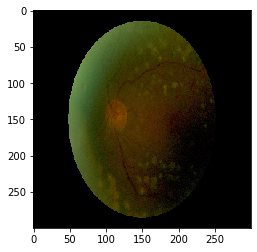

In [39]:
print(plt.imshow(X[2]))
df['raw labels'][2]

AxesImage(54,36;334.8x217.44)


"['N']"

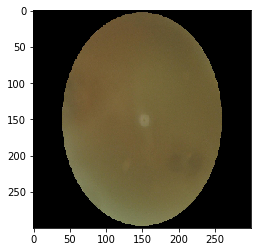

In [40]:
print(plt.imshow(X[0]))
df['raw labels'][0]

In [20]:
# Keeping only the 8 fields for the images to be trained and tested under them:
y = np.array(df.drop(['ID', 'raw labels', 'target'],axis=1))
y.shape

(6392, 8)

In [21]:
# Splitting the data to train and test dataset:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.3)

# Model Deployment:

In [29]:
# Activation function used: Sigmoid, Neurons: 25
model = Sequential()
model.add(Conv2D(filters=16, kernel_size=(5, 5), activation="relu", input_shape=(300, 300, 3)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(filters=32, kernel_size=(5, 5), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(filters=64, kernel_size=(5, 5), activation="relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(filters=64, kernel_size=(5, 5), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(200, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(8, activation='sigmoid'))

In [30]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 296, 296, 16)      1216      
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 148, 148, 16)      0         
_________________________________________________________________
dropout_12 (Dropout)         (None, 148, 148, 16)      0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 144, 144, 32)      12832     
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 72, 72, 32)        0         
_________________________________________________________________
dropout_13 (Dropout)         (None, 72, 72, 32)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 68, 68, 64)       

In [31]:
# Loss function used: binary_crossentropy, Optimizer: ADAM 
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Training the Model:

In [32]:
# Training the Model for 10 epochs:
model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test), batch_size=64)

Epoch 1/10
70/70 [==============================] - 385s 5s/step - loss: 0.4494 - accuracy: 0.2593 - val_loss: 0.3728 - val_accuracy: 0.3066
Epoch 2/10
70/70 [==============================] - 345s 5s/step - loss: 0.3938 - accuracy: 0.3060 - val_loss: 0.3617 - val_accuracy: 0.3650
Epoch 3/10
70/70 [==============================] - 345s 5s/step - loss: 0.3802 - accuracy: 0.3169 - val_loss: 0.3672 - val_accuracy: 0.3066
Epoch 4/10
70/70 [==============================] - 343s 5s/step - loss: 0.3742 - accuracy: 0.3205 - val_loss: 0.3613 - val_accuracy: 0.3066
Epoch 5/10
70/70 [==============================] - 347s 5s/step - loss: 0.3711 - accuracy: 0.3216 - val_loss: 0.3595 - val_accuracy: 0.3790
Epoch 6/10
70/70 [==============================] - 345s 5s/step - loss: 0.3665 - accuracy: 0.3473 - val_loss: 0.3585 - val_accuracy: 0.4030
Epoch 7/10
70/70 [==============================] - 342s 5s/step - loss: 0.3636 - accuracy: 0.3646 - val_loss: 0.3583 - val_accuracy: 0.3493
Epoch 8/10
70

# Validating  the Trained Model:

D


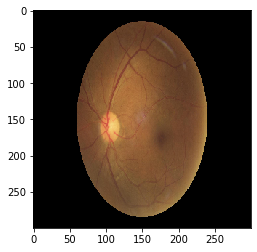

In [56]:
img = image.load_img("C:\\Users\\hp\\Desktop\\AIML\\Internship_DL\\Training Images\\4688_left.jpg",target_size=(300, 300, 3))
img = image.img_to_array(img)
img = img/255
classes = np.array(df.columns[2:])
proba = model.predict(img.reshape(1, 300, 300, 3))
top = np.argsort(proba[0])[:-4:-1]
for i in range(1):
    print("{}".format(classes[top[i]]))
plt.imshow(img)

G


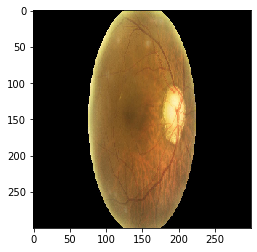

In [57]:
img = image.load_img("C:\\Users\\hp\\Desktop\\AIML\\Internship_DL\\Training Images\\4_right.jpg",target_size=(300, 300, 3))
img = image.img_to_array(img)
img = img/255
classes = np.array(df.columns[2:])
proba = model.predict(img.reshape(1, 300, 300,3))
top = np.argsort(proba[0])[:-4:-1]
for i in range(1):
    print("{}".format(classes[top[i]]))
plt.imshow(img)